# Wind Energy Data Model

## Project Description
A research engineer is investigating the use of a windmill to generate electricity in different provinces in Canada. She has collected data on the DC output from these windmills and the corresponding wind velocity. The data are listed in "Windmill.csv".
Build a model to predict the DC output for a given wind speed in mph (mile per hour).
<img src='WindMill.jpg' width=500 height=500/></a>

## Importing the Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the Data and Checking

In [2]:
dataset = pd.read_csv('Windmill.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, -1].values

In [3]:
# A quick check

## Missing Data

In [4]:
# all good

## Feature Scaling

<font color=red> Note:<font color=blue>StandardScaler only accept the data in Matrix format. So, we need to reshape the vecctor y which is 1D array to a matrix of 25x1

In [5]:
y = y.reshape(len(y),1)

In [6]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_Scaled = sc_X.fit_transform(X)
y_Scaled = sc_y.fit_transform(y)

# Regression

## Linear Regression

### Building the Model

In [7]:
from sklearn.linear_model import LinearRegression
Model1 = LinearRegression()
Model1.fit(X_Scaled, y_Scaled)

LinearRegression()

### Checking the Results

In [8]:
y_byModel=Model1.predict(X_Scaled)
y_byModel_Unscaled=sc_y.inverse_transform(y_byModel)

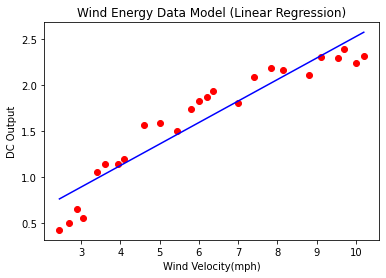

In [9]:
plt.scatter(X, y, color = 'red')
plt.plot(X, y_byModel_Unscaled, color = 'blue')
plt.title('Wind Energy Data Model (Linear Regression)')
plt.xlabel('Wind Velocity(mph)')
plt.ylabel('DC Output')
plt.show()

## Polynomial Regression

### Building the Model

In [10]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_Scaled)
Model2= LinearRegression()
Model2.fit(X_poly, y_Scaled)

LinearRegression()

### Checking the Results

In [11]:
y_byModel=Model2.predict(X_poly)
y_byModel_Unscaled=sc_y.inverse_transform(y_byModel)

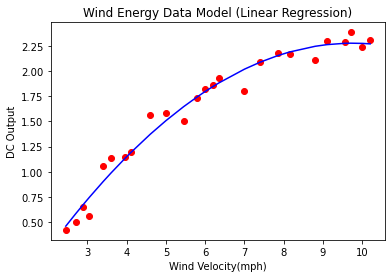

In [12]:
plt.scatter(X, y, color = 'red')
plt.plot(X, y_byModel_Unscaled, color = 'blue')
plt.title('Wind Energy Data Model (Linear Regression)')
plt.xlabel('Wind Velocity(mph)')
plt.ylabel('DC Output')
plt.show()

## Support Vector Regression
<font color=blue> Try:<br>
    - Polynomial Kernel (poly) <br>
    - Gaussian Radial Basis Function (rbf) Kernel<br>
    - Linear Kernel (linear),<br>

### Building the Model

In [13]:
from sklearn.svm import SVR
Model3= SVR(kernel = 'rbf')
Model3.fit(X_Scaled, y_Scaled)

C:\Users\Tree\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

### Checking the Results

In [14]:
y_byModel=Model3.predict(X_Scaled)
y_byModel_Unscaled=sc_y.inverse_transform(y_byModel)

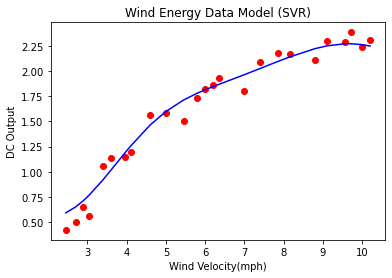

In [15]:
plt.scatter(X, y, color = 'red')
plt.plot(X, y_byModel_Unscaled, color = 'blue')
plt.title('Wind Energy Data Model (SVR)')
plt.xlabel('Wind Velocity(mph)')
plt.ylabel('DC Output')
plt.show()

#####  Comparing the Models
<font color=blue> Ranking from best to worst:<br>
    - SVR<br>
    - Polynomial Degree 2<br>
    - Linear<br>
<font color=magenta> What is a systematic way to compare the accuracy of the model? (Go Tutorials...)

##### End